<a href="https://colab.research.google.com/github/yongguang-Zhang/MiCroDential_2022/blob/Mini-Project/Iris_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [138]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Iris.csv')

# EDA

In [139]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [140]:
# Check if there are null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [141]:
# Check how many iris species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [142]:
# Convert the Spcies column into numbers
def species_to_num(x):
  if x == 'Iris-setosa':
    return 0
  elif x == 'Iris-versicolor':
    return 1
  else:
    return 2


In [143]:
# Apply the method on 'Species' column
df['Species'] = df['Species'].apply(species_to_num)

In [144]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [145]:
# Set up 'Id' Column as index
df.set_index('Id')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


# Normalize the Data

## Use StandardScaler to normalize the data

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
# Create scaler model
scalar = StandardScaler()

In [148]:
# Train the data
scalar.fit(df.drop(labels='Species',axis=1))

StandardScaler()

In [149]:
# Normalize the original data without 'Species' column
scaled_data = scalar.transform(df.drop('Species',axis=1))

In [150]:
# Create a new Dataframe hold the data we just normalized
df_scaled = pd.DataFrame(scaled_data,columns=df.columns[:-1])

In [151]:
df_scaled.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


# Split the Data

In [152]:
# import necessary module
from sklearn.model_selection import train_test_split

In [153]:
# test_size = 0.3 : 
#           Size of testing data is 30% of the data
#           Size of trainning data is 70% of the data
X_train,X_test,y_train,y_test = train_test_split(scaled_data,df['Species'],test_size=0.3)

# Create and Train Model

In [154]:
# Import Knn model 
from sklearn.neighbors import KNeighborsClassifier

In [155]:
# Create the knn model
knn = KNeighborsClassifier(n_neighbors=4)

In [156]:
# Train the knn model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [157]:
# use X_test data to predict 
predict = knn.predict(X_test)

In [158]:
from sklearn.metrics import classification_report,confusion_matrix

In [159]:
print(confusion_matrix(y_test,predict))

[[19  0  0]
 [ 0 16  0]
 [ 0  0 10]]


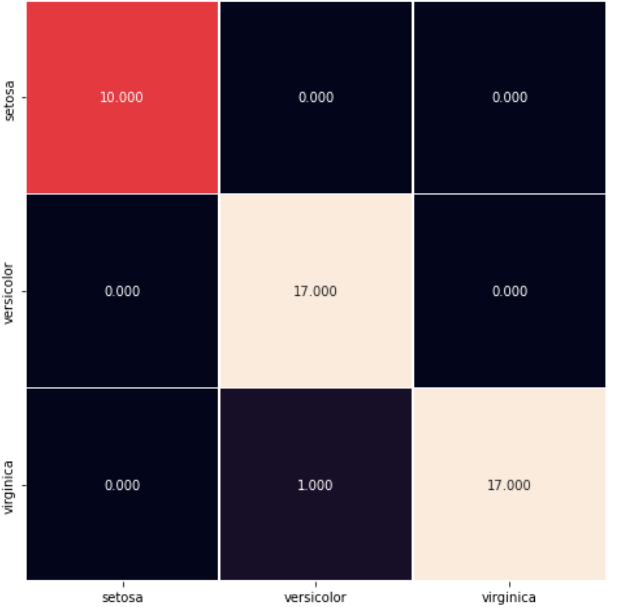

In [160]:
# Print out classification report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Visulize KNN Model

## Visulize KNN Model with kneighbor = 2 by heatmap

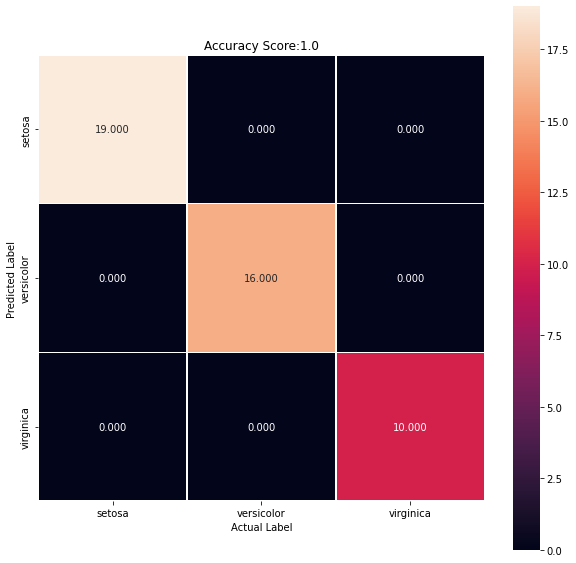

In [161]:
# Create a list to store x and y axis value
Tick_Label = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize=(10,10))
# Display knn model heatmap
sns.heatmap(confusion_matrix(y_test,predict),annot=True,fmt='.3f',linewidths=.5,
      square=True,xticklabels = Tick_Label,yticklabels=Tick_Label)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
all_sample_title = f"Accuracy Score:{round(knn.score(X_test,y_test),3)}"
plt.title(all_sample_title,size=12)
plt.show()

## Visulize K Value with a range of kneighbors

In [162]:
from sklearn import metrics

In [163]:
k_value = []

In [164]:
# creating a for loop to test n_neighbors in range 1 to 39
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  k_value.append(metrics.accuracy_score(y_test,y_pred))
print(k_value)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777]


Text(0, 0.5, 'Testing Accuracy')

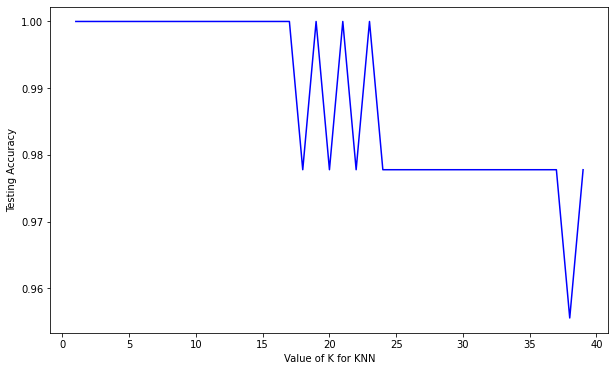

In [165]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),k_value,color='blue')
plt.xlabel("Value of K for KNN")
plt.ylabel('Testing Accuracy')

## Visulize Error Rate VS. K value

In [166]:
error_rate = []

In [167]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

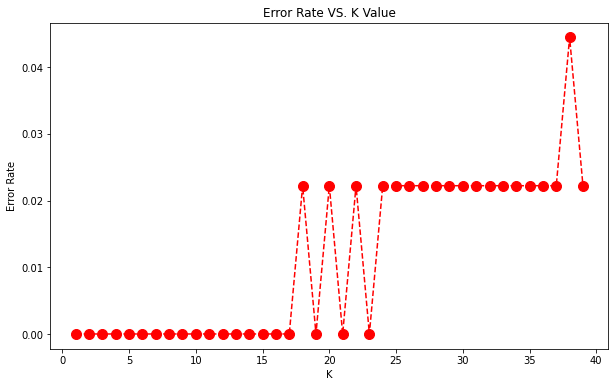

In [168]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate VS. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Logistic Regession

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
logmodel = LogisticRegression()

In [171]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [172]:
predictions = logmodel.predict(X_test)

In [173]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[19  0  0]
 [ 0 16  0]
 [ 0  0 10]]


In [174]:
print(logmodel.score(X_test,y_test))

1.0
